# mach-learn

Collection of some machine learning algorithm written for python. <br>
By Abdullah Aleem

This collection has following algoithms:-

* Decision Tree (dt.py)
* KNN (knn.py)
* Percepton (perceptron.py)
* Multiclass Classifiers (multiclass.py)
    * One vs All
    * All vs All
    * MC Tree
* Linear Classifer with Gradient Descendent (linear.py and gd.py)
    * Squared Loss
    * Logistic Loss
    * Hinge Loss
* Clustering (clustering.py)
    * FirstK
    * Random
    * Further First Heuristic
    * KMeans++

Although there are several libraries available the reasons I compliled my own is:
1. To better understand the algorithms.
2. To changes in algorithm with respect to the task and data available.
3. Make it easy to tune hyperparameter, using inbuilt functions.

Lastly, feel free to use any of this code. Although this only contains a handful of algorithms but Ill keep on adding more in the future.

In [21]:
from pylab import *
from numpy import *
import math

## Datasets
`datasets.py` has some prewritten data loading function that I would be using for this notebook. 

In [22]:
import datasets

**Sentiment Dataset**

<img src="data/sentiments.png" width="80%">

In [23]:
xTrainSentiment, yTrainSentiment, dictionarySentiment = datasets.loadTextDataBinary('data/sentiment.tr')
xTestSentiment, yTestSentiment,_ = datasets.loadTextDataBinary('data/sentiment.te', dictionarySentiment)
xValidateSentiment, yValidateSentiment,_ = datasets.loadTextDataBinary('data/sentiment.de', dictionarySentiment)

**Digits Dataset**

<table>
 <tr>
  <td><img src="data/1vs2.tr.png" width="60%"></td>
  <td><img src="data/2vs3.tr.png" width="60%"></td>
 </tr>
</table>

In [24]:
xTrainDigit, yTrainDigit, xTestDigit, yTestDigit = datasets.loadDigitData('data/1vs2.all')

** Wine Dataset **
<img src="data/wineimg.png">

In [25]:
from datasets import WineData, WineDataSmall, WineDataBinary

**2-D Dataset for Clustering**

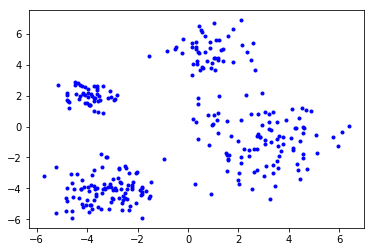

In [26]:
from datasets import X2d2

for i in range(len(X2d2)):
    plot(X2d2[i][0], X2d2[i][1],'b'+'.')
show()

# Decision Trees

### **Training**

In [27]:
import dt

# Defining and Training Model
decisionTree = dt.DT({'maxDepth': 2})
decisionTree.train(xTrainSentiment, yTrainSentiment)
print('Model Trained Sucessfully.\n')

# Printing the model
print('The Decision Tree is:\n')
print(decisionTree)

# Numbers maped back to words. (Optional for sentiment dataset.)
print('Where:')
print('531 = ', dictionarySentiment[531])
print('581 = ', dictionarySentiment[581])
print('2714 = ', dictionarySentiment[2714])

Model Trained Sucessfully.

The Decision Tree is:

Branch 531
  Branch 581
    Leaf 1.0
    Leaf 0.0
  Branch 2714
    Leaf 0.0
    Leaf 1.0

Where:
531 =  bad
581 =  worst
2714 =  perfect


### **Testing**

In [28]:
print('Accuracy =', 100*mean(decisionTree.predictAll(xTestSentiment) == yTestSentiment),'%')

Accuracy = 62.5 %


### **Hyperparameter Tuning**

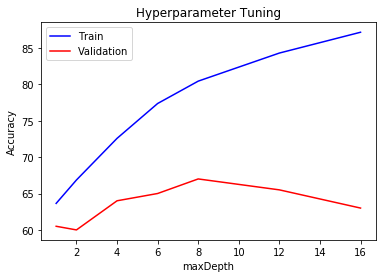

In [29]:
decisionTree = dt.DT({})
decisionTree.tuneHyperparameter('maxDepth', [1,2,4,6,8,12,16],
                                xTrainSentiment, yTrainSentiment,
                                xValidateSentiment, yValidateSentiment)

# KNN

### **Training**

In [30]:
import knn

nearestNeighbour = knn.KNN({'isKNN': True, 'K': 3})
nearestNeighbour.train(xTrainDigit, yTrainDigit)
print('Model Trained Sucessfully.\n')

Model Trained Sucessfully.



### **Testing**

In [31]:
print('Accuracy =', 100*mean(nearestNeighbour.predictAll(xTestDigit) == yTestDigit),'%')

Accuracy = 93.0 %


### **Hyperparamter tuning**

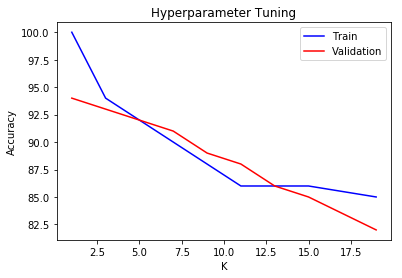

In [32]:
nearestNeighbour = knn.KNN({'isKNN': True})
nearestNeighbour.tuneHyperparameter('K', [1,3,5,7,9,11,13,15,19],
                                    xTrainDigit, yTrainDigit,
                                    xTestDigit, yTestDigit)

# Perceptron

### **Training**

In [33]:
import perceptron

perceptronModel = perceptron.Perceptron({'numEpoch': 2})
perceptronModel.train(datasets.SentimentData.X, datasets.SentimentData.Y)

### **Testing**

In [34]:
print('Accuracy =', 100*mean((perceptronModel.predictAll(datasets.SentimentData.Xte) >=0) == (datasets.SentimentData.Yte>=0)),'%')

Accuracy = 79.75 %


### **Hyperparamter tuning**

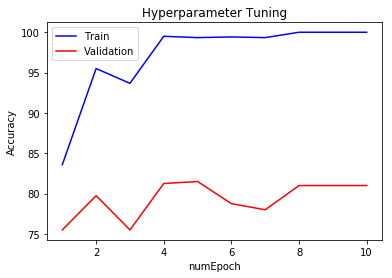

In [35]:
perceptronModel = perceptron.Perceptron({})
perceptronModel.tuneHyperparameter('numEpoch', [1,2,3,4,5,6,7,8,9,10],
                                    datasets.SentimentData.X, datasets.SentimentData.Y,
                                    datasets.SentimentData.Xte, datasets.SentimentData.Yte)

# Multiclass
These classifers can be run on top of any binary classifiers. e.g. svm or decison trees. <br>

###  **One vs All**
Like the name suggests, it makes a classifer by taking a class as positive and all others as negative.

In [36]:
from sklearn.tree import DecisionTreeClassifier
import multiclass

h = multiclass.OVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print('\n','Accuracy = ', 100*mean(P == WineDataSmall.Yte),'%')

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest

 Accuracy =  60.3938730853 %


### **All vs All**
It makes a classifer each class against each. Ignoring all the rest.

In [37]:
h = multiclass.AVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print('\n','Accuracy = ', 100*mean(P == WineDataSmall.Yte),'%')

training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier for 4 versus 0
training classifier for 4 versus 1
training classifier for 4 versus 2
training classifier for 4 versus 3

 Accuracy =  58.4245076586 %


###  **MC Tree**
It divides up the data in a hierarchical tree like structure.

In [38]:
t = multiclass.makeBalancedTree(range(5))

h = multiclass.MCTree(t, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print('\n','Accuracy = ', 100*mean(P == WineDataSmall.Yte),'%')

training classifier for [0, 1] versus [2, 3, 4]
training classifier for [0] versus [1]
training classifier for [2] versus [3, 4]
training classifier for [3] versus [4]

 Accuracy =  56.0175054705 %


# Gradient Descent and Linear Classification

`gd.py` contains a generic gradient descent method. It takes five
parameters: the function we're optimizing, it's gradient, an initial
position, a number of iterations to run, and an initial step size.

For linear classifier in `linear.py`. 
We have an interface `LossFunction` that we want to minimize.<br>
There are three loss function stubs: `SquaredLoss`, `LogisticLoss` and `HingeLoss`


### **Testing Gradient Descent**

Using function **x^4 - 4x^2 - x**, it has two minimas around -1.3 and 1.5. We wil try optimizing it by starting from two different points. 

<img src="data/Capture.PNG" align="left" float="left"/>
<br>

Solution found =  -1.34699740853

 Trajactory:


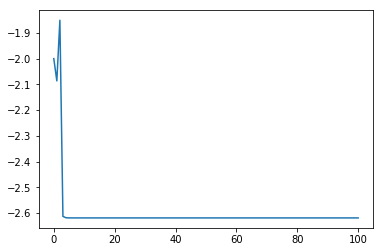

Solution found =  1.47299760111

 Trajactory:


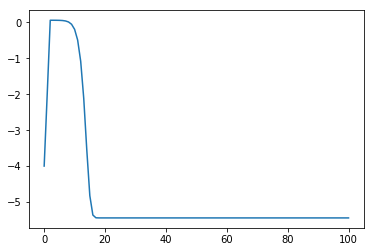

In [39]:
import gd

x, trajectory = gd.gd(lambda x: x**4 - 4*x**2 - x , lambda x: 4*x**3 - 8*x - 1, -1, 100, 0.2)

print('Solution found = ', x)
print('\n Trajactory:')
plot(trajectory)
show()

x, trajectory = gd.gd(lambda x: x**4 - 4*x**2 - x , lambda x: 4*x**3 - 8*x - 1, 1, 100, 0.2)

print('Solution found = ', x)
print('\n Trajactory:')
plot(trajectory)
show()

### Linear Classifier

In [41]:
import linear

# SquaredLoss
linear1 = linear.LinearClassifier({'lossFunction': linear.SquaredLoss(), 
                                   'lambda': 1, 
                                   'numIter': 100, 
                                   'stepSize': 0.5})

linear1.train(WineDataBinary.X, WineDataBinary.Y)
print('Accuracy with SquaredLoss =', 100*mean((linear1.predictAll(WineDataBinary.Xte) >=0) == (WineDataBinary.Yte>=0)),'%')


# LogisticLoss
linear2 = linear.LinearClassifier({'lossFunction': linear.LogisticLoss(), 
                                   'lambda': 1, 
                                   'numIter': 100, 
                                   'stepSize': 0.5})

linear2.train(WineDataBinary.X, WineDataBinary.Y)
print('Accuracy with LogisticLoss =', 100*mean((linear2.predictAll(WineDataBinary.Xte) >=0) == (WineDataBinary.Yte>=0)),'%')


# HingeLoss
linear3 = linear.LinearClassifier({'lossFunction': linear.HingeLoss(), 
                                   'lambda': 1, 
                                   'numIter': 100, 
                                   'stepSize': 0.5})

linear3.train(WineDataBinary.X, WineDataBinary.Y)
print('Accuracy with HingeLoss =', 100*mean((linear3.predictAll(WineDataBinary.Xte) >=0) == (WineDataBinary.Yte>=0)),'%')

Accuracy with SquaredLoss = 31.3653136531 %
Accuracy with LogisticLoss = 97.4169741697 %
Accuracy with HingeLoss = 68.6346863469 %


# Clustering (Unsupervised)

4 heuristics are available to initialize clusters: <br>


**determ:** just use the first K points as centers <br>
**random:** pick K random centers  <br>
**ffh:** pick the first center randomly and each subsequent center according to the furthest first heuristic <br>
**km++:** pick the first center randomly and each subsequent center according to the kmeans++ method

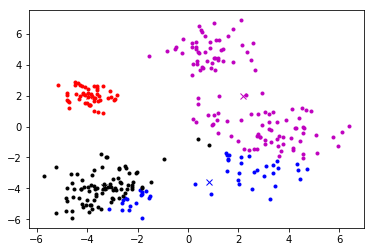

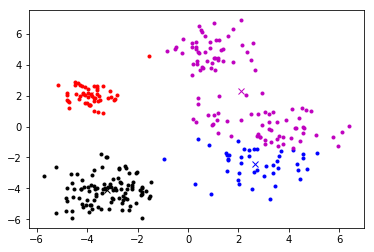

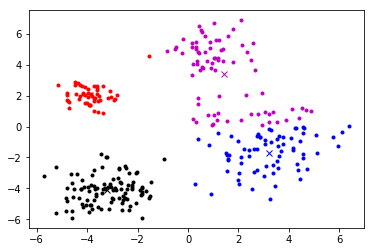

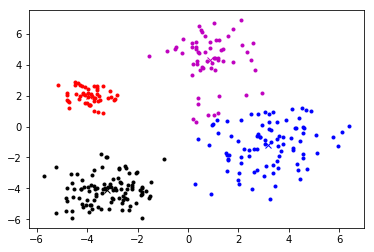

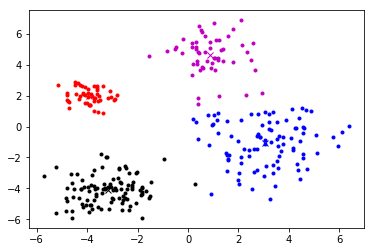

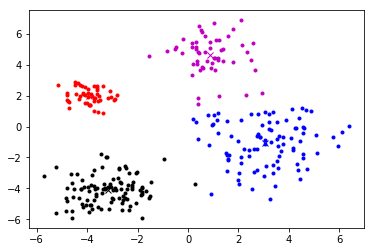

Converging Iteration 5, objective=2.3479513734792916


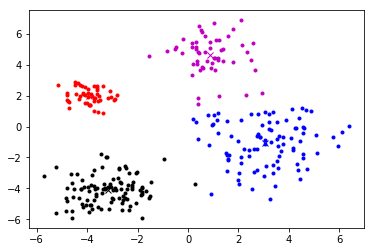

Clusters center= 
 [[ 3.06150611 -1.07977065]
 [-3.92433223  1.99052827]
 [ 0.87252863  4.63384851]
 [-3.17087245 -4.10528255]]


In [43]:
import clustering, datasets

mu0 = clustering.initialize_clusters(X2d2, 4, 'determ')
(mu,z,obj) = clustering.kmeans(X2d2, mu0)


print('Clusters center= \n', mu)